# Euler and Heun Methods: Three different Initial Value Problems

**Student:** Mert Eldemir  
**Student Number:** 25120205086  

Short notebook to explain both Euler and Heun methods, then solve three IVPs and compare their accuracy.

## Euler Method
Basically, Euler method just uses the slope at our current point and goes straight in that direction for the whole step. It's simple and quick to calculate, but the problem is if the curve is bending, we're just walking in a straight line and missing that bend. So each step adds a bit more error, and if we don't use really small steps, things can drift away from the real answer pretty fast.

## Heun Method
Heun method is smarter - it does an Euler step first (called the predictor), then looks at the slope at that predicted endpoint too. Then it averages both slopes instead of just using the first one. This way we're kind of accounting for how the curve bends during our step. The cool thing is this averaging trick cuts down the error by a lot, so we get way more accurate results without having to make our steps super tiny.

## Formulas
- Euler: $y_{n+1} = y_n + h\,f(x_n, y_n)$

- Heun (improved Euler):
  - Predictor: $y_{n+1}^{(p)} = y_n + h\,f(x_n, y_n)$
  - Corrector: $y_{n+1} = y_n + \tfrac{h}{2}\left[f(x_n, y_n) + f(x_{n+1}, y_{n+1}^{(p)})\right]$

## IVPs we will solve
- $y' = y(1 - y/2)$, $y(0)=0.5$, exact $y(x)=\tfrac{2}{1+3 e^{-x}}$, on $[0,3]$, $h=0.2$.
- $y' = -2y + 2 - e^{-4x}$, $y(0)=1$, exact $y(x)=1 + 0.5 e^{-4x} - 0.5 e^{-2x}$, on $[0,2]$, $h=0.2$.
- $y' = \cos x - y$, $y(0)=0$, exact $y(x)=0.5(\sin x + \cos x - e^{-x})$, on $[0,3]$, $h=0.2$.

In [9]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

In [10]:
def euler_solve(f, x0, y0, h, n_steps):
    """
    Euler method: y_{n+1} = y_n + h * f(x_n, y_n)
    
    Args:
        f: function(x, y) that defines the ODE y' = f(x, y)
        x0: initial x value
        y0: initial y value
        h: step size
        n_steps: number of steps to take
    
    Returns:
        x_vals: array of x values
        y_vals: array of y values
    """
    x_vals = np.zeros(n_steps + 1)
    y_vals = np.zeros(n_steps + 1)
    
    x_vals[0] = x0
    y_vals[0] = y0
    
    for i in range(n_steps):
        x_vals[i + 1] = x_vals[i] + h
        y_vals[i + 1] = y_vals[i] + h * f(x_vals[i], y_vals[i])
    
    return x_vals, y_vals


def heun_solve(f, x0, y0, h, n_steps):
    """
    Heun method (improved Euler):
    - Predictor: y_pred = y_n + h * f(x_n, y_n)
    - Corrector: y_{n+1} = y_n + (h/2) * [f(x_n, y_n) + f(x_{n+1}, y_pred)]
    
    Args:
        f: function(x, y) that defines the ODE y' = f(x, y)
        x0: initial x value
        y0: initial y value
        h: step size
        n_steps: number of steps to take
    
    Returns:
        x_vals: array of x values
        y_vals: array of y values
    """
    x_vals = np.zeros(n_steps + 1)
    y_vals = np.zeros(n_steps + 1)
    
    x_vals[0] = x0
    y_vals[0] = y0
    
    for i in range(n_steps):
        x_n = x_vals[i]
        y_n = y_vals[i]
        x_next = x_n + h
        
        # Predictor step (Euler)
        slope1 = f(x_n, y_n)
        y_pred = y_n + h * slope1
        
        # Corrector step (average of slopes)
        slope2 = f(x_next, y_pred)
        y_vals[i + 1] = y_n + (h / 2) * (slope1 + slope2)
        x_vals[i + 1] = x_next
    
    return x_vals, y_vals

In [11]:
# Problem 1: Logistic growth
# y' = y(1 - y/2), y(0) = 0.5
def f1(x, y):
    return y * (1 - y/2)

def exact1(x):
    return 2 / (1 + 3 * np.exp(-x))


# Problem 2: Damped/forced ODE
# y' = -2y + 2 - e^(-4x), y(0) = 1
def f2(x, y):
    return -2*y + 2 - np.exp(-4*x)

def exact2(x):
    return 1 + 0.5 * np.exp(-4*x) - 0.5 * np.exp(-2*x)


# Problem 3: Oscillatory forcing
# y' = cos(x) - y, y(0) = 0
def f3(x, y):
    return np.cos(x) - y

def exact3(x):
    return 0.5 * (np.sin(x) + np.cos(x) - np.exp(-x))

## Problem 1: Logistic Growth

In [12]:
# Solve Problem 1: y' = y(1 - y/2), y(0) = 0.5, on [0, 3] with h = 0.2
x0, y0 = 0, 0.5
h = 0.2
x_end = 3
n_steps = int((x_end - x0) / h)

# Euler method
x_euler1, y_euler1 = euler_solve(f1, x0, y0, h, n_steps)

# Heun method
x_heun1, y_heun1 = heun_solve(f1, x0, y0, h, n_steps)

# Exact solution
y_exact1 = exact1(x_euler1)

# Create table
df1 = pd.DataFrame({
    'x': x_euler1,
    'Euler y': y_euler1,
    'Heun y': y_heun1,
    'Exact y': y_exact1,
    'Euler Error': np.abs(y_euler1 - y_exact1),
    'Heun Error': np.abs(y_heun1 - y_exact1)
})

print("Problem 1: Logistic Growth")
print("="*70)
print(df1.to_string(index=False))
print(f"\nMax Euler Error: {df1['Euler Error'].max():.6f}")
print(f"Max Heun Error: {df1['Heun Error'].max():.6f}")

Problem 1: Logistic Growth
  x  Euler y   Heun y  Exact y  Euler Error  Heun Error
0.0 0.500000 0.500000 0.500000     0.000000    0.000000
0.2 0.575000 0.578469 0.578672     0.003672    0.000203
0.4 0.656937 0.663828 0.664240     0.007302    0.000412
0.6 0.745168 0.755115 0.755734     0.010565    0.000618
0.8 0.838674 0.850979 0.851794     0.013119    0.000815
1.0 0.936072 0.949737 0.950734     0.014662    0.000997
1.2 1.035663 1.049488 1.050650     0.014987    0.001162
1.4 1.135536 1.148252 1.149563     0.014028    0.001311
1.6 1.233699 1.244126 1.245571     0.011872    0.001445
1.8 1.328237 1.335428 1.336991     0.008753    0.001562
2.0 1.417463 1.420806 1.422469     0.005006    0.001663
2.2 1.500036 1.499297 1.501040     0.001004    0.001743
2.4 1.575032 1.570337 1.572137     0.002895    0.001800
2.6 1.641966 1.633733 1.635563     0.006403    0.001830
2.8 1.700754 1.689600 1.691432     0.009322    0.001832
3.0 1.751648 1.738291 1.740097     0.011551    0.001806

Max Euler Error: 0.0

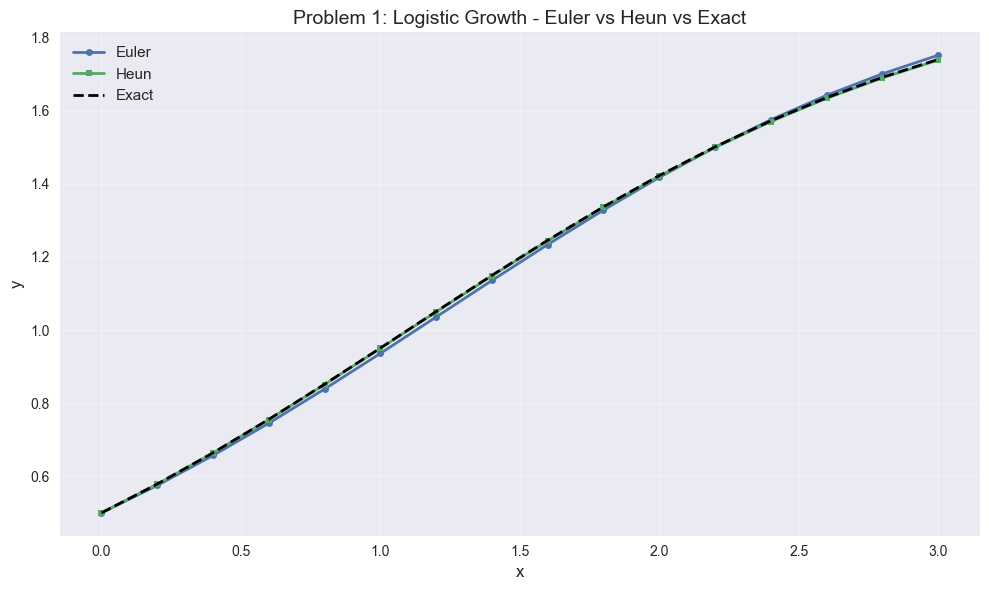

In [13]:
# Plot Problem 1
plt.figure(figsize=(10, 6))
plt.plot(x_euler1, y_euler1, 'o-', label='Euler', linewidth=2, markersize=5)
plt.plot(x_heun1, y_heun1, 's-', label='Heun', linewidth=2, markersize=5)
plt.plot(x_euler1, y_exact1, '--', label='Exact', linewidth=2, color='black')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Problem 1: Logistic Growth - Euler vs Heun vs Exact', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Problem 2: Damped/Forced ODE

In [14]:
# Solve Problem 2: y' = -2y + 2 - e^(-4x), y(0) = 1, on [0, 2] with h = 0.2
x0, y0 = 0, 1
h = 0.2
x_end = 2
n_steps = int((x_end - x0) / h)

# Euler method
x_euler2, y_euler2 = euler_solve(f2, x0, y0, h, n_steps)

# Heun method
x_heun2, y_heun2 = heun_solve(f2, x0, y0, h, n_steps)

# Exact solution
y_exact2 = exact2(x_euler2)

# Create table
df2 = pd.DataFrame({
    'x': x_euler2,
    'Euler y': y_euler2,
    'Heun y': y_heun2,
    'Exact y': y_exact2,
    'Euler Error': np.abs(y_euler2 - y_exact2),
    'Heun Error': np.abs(y_heun2 - y_exact2)
})

print("Problem 2: Damped/Forced ODE")
print("="*70)
print(df2.to_string(index=False))
print(f"\nMax Euler Error: {df2['Euler Error'].max():.6f}")
print(f"Max Heun Error: {df2['Heun Error'].max():.6f}")

Problem 2: Damped/Forced ODE
  x  Euler y   Heun y  Exact y  Euler Error  Heun Error
0.0 1.000000 1.000000 1.000000     0.000000    0.000000
0.2 0.800000 0.895067 0.889504     0.089504    0.005563
0.4 0.790134 0.881496 0.876284     0.086150    0.005212
0.6 0.833701 0.898232 0.894762     0.061061    0.003470
0.8 0.882077 0.921278 0.919433     0.037356    0.001846
1.0 0.921094 0.942192 0.941490     0.020396    0.000702
1.2 0.948993 0.958769 0.958756     0.009763    0.000013
1.4 0.967750 0.971099 0.971444     0.003694    0.000345
1.6 0.979910 0.979959 0.980450     0.000539    0.000490
1.8 0.987614 0.986198 0.986711     0.000902    0.000513
2.0 0.992419 0.990536 0.991010     0.001409    0.000474

Max Euler Error: 0.089504
Max Heun Error: 0.005563


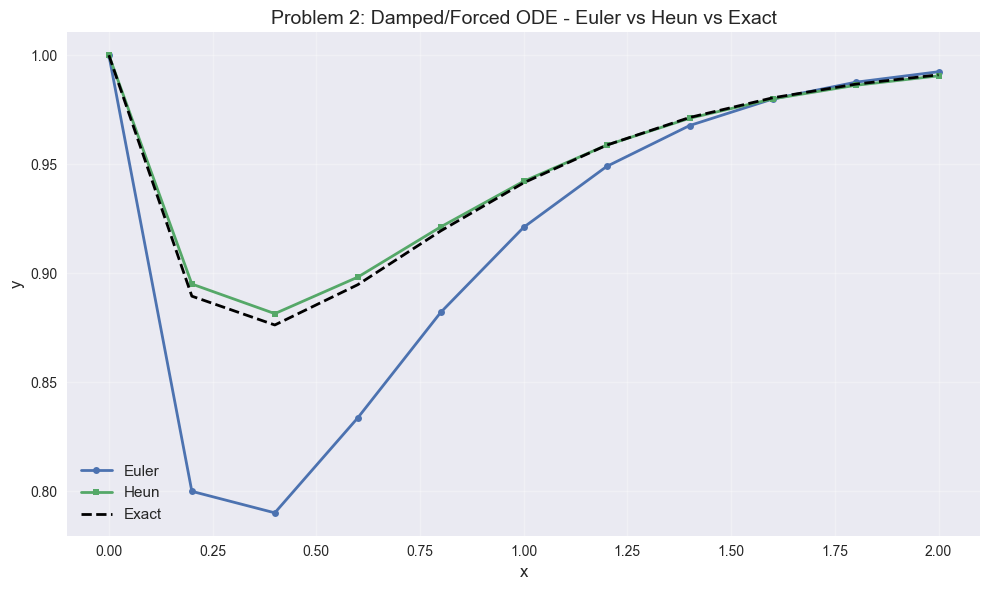

In [15]:
# Plot Problem 2
plt.figure(figsize=(10, 6))
plt.plot(x_euler2, y_euler2, 'o-', label='Euler', linewidth=2, markersize=5)
plt.plot(x_heun2, y_heun2, 's-', label='Heun', linewidth=2, markersize=5)
plt.plot(x_euler2, y_exact2, '--', label='Exact', linewidth=2, color='black')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Problem 2: Damped/Forced ODE - Euler vs Heun vs Exact', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Problem 3: Oscillatory Forcing

In [16]:
# Solve Problem 3: y' = cos(x) - y, y(0) = 0, on [0, 3] with h = 0.2
x0, y0 = 0, 0
h = 0.2
x_end = 3
n_steps = int((x_end - x0) / h)

# Euler method
x_euler3, y_euler3 = euler_solve(f3, x0, y0, h, n_steps)

# Heun method
x_heun3, y_heun3 = heun_solve(f3, x0, y0, h, n_steps)

# Exact solution
y_exact3 = exact3(x_euler3)

# Create table
df3 = pd.DataFrame({
    'x': x_euler3,
    'Euler y': y_euler3,
    'Heun y': y_heun3,
    'Exact y': y_exact3,
    'Euler Error': np.abs(y_euler3 - y_exact3),
    'Heun Error': np.abs(y_heun3 - y_exact3)
})

print("Problem 3: Oscillatory Forcing")
print("="*70)
print(df3.to_string(index=False))
print(f"\nMax Euler Error: {df3['Euler Error'].max():.6f}")
print(f"Max Heun Error: {df3['Heun Error'].max():.6f}")

Problem 3: Oscillatory Forcing
  x   Euler y    Heun y   Exact y  Euler Error  Heun Error
0.0  0.000000  0.000000  0.000000     0.000000    0.000000
0.2  0.200000  0.178007  0.180003     0.019997    0.001996
0.4  0.356013  0.316477  0.320080     0.035934    0.003603
0.6  0.469023  0.415729  0.420583     0.048440    0.004854
0.8  0.540285  0.476596  0.482367     0.057918    0.005771
1.0  0.571570  0.500575  0.506947     0.064623    0.006372
1.2  0.565316  0.489932  0.496601     0.068715    0.006670
1.4  0.524725  0.447729  0.454410     0.070315    0.006681
1.6  0.453773  0.377815  0.384239     0.069534    0.006423
1.8  0.357179  0.284752  0.290673     0.066505    0.005921
2.0  0.240302  0.173706  0.178908     0.061395    0.005201
2.2  0.109013  0.050297  0.054596     0.054416    0.004299
2.4 -0.030490 -0.079576 -0.076324     0.045834    0.003251
2.6 -0.171871 -0.209932 -0.207830     0.035960    0.002102
2.8 -0.308874 -0.334918 -0.334022     0.025148    0.000896
3.0 -0.435544 -0.449010 -

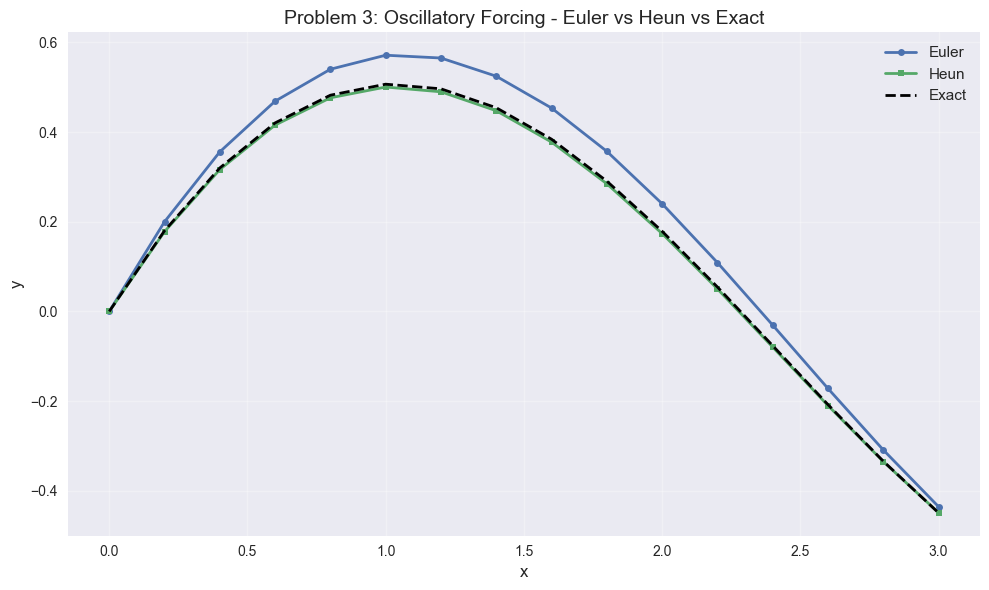

In [17]:
# Plot Problem 3
plt.figure(figsize=(10, 6))
plt.plot(x_euler3, y_euler3, 'o-', label='Euler', linewidth=2, markersize=5)
plt.plot(x_heun3, y_heun3, 's-', label='Heun', linewidth=2, markersize=5)
plt.plot(x_euler3, y_exact3, '--', label='Exact', linewidth=2, color='black')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Problem 3: Oscillatory Forcing - Euler vs Heun vs Exact', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Comparison and Interpretation

After solving all three problems and looking at the results, I can see some interesting differences between how Euler and Heun methods work.

**What I noticed:**

1. **Errors:** Looking at the tables, Heun's errors are definitely smaller than Euler's in all three problems. This makes sense from what we learned - since Heun checks the slope twice and averages them, it's naturally going to be more accurate.

2. **Problem 1 (Logistic Growth):** Both methods follow the S-shaped curve okay, but I noticed Euler falls a bit behind when the growth speeds up. Heun does better here because it's looking at slopes from both the start and end of each step.

3. **Problem 2 (Damped/Forced):** This one has those exponential terms that decay really fast. Euler has more trouble with this one because the slope is changing so quickly. Heun handles it better since it's averaging the slopes instead of just taking the first one.

4. **Problem 3 (Oscillatory):** With the cosine term making the solution curve around, Euler kind of misses the turns because it only uses one tangent line. Heun catches more of the curvature by checking ahead, so it stays closer to the exact solution.

**Why Heun works better:**

The main issue with Euler is that it just trusts the first slope for the whole step. If the curve is bending (which it usually is), we're walking in the wrong direction. Heun fixes this by taking a test step, seeing what the slope is there, then using the average of both slopes. It's like getting a second opinion before committing to the step. This extra calculation really pays off - the error gets cut down significantly.

With the step size I used (h=0.2), Heun gave much better results than Euler. Of course we could make h smaller to improve Euler, but then we'd need way more steps. Heun gives us a good balance - decent step size but still accurate.